# Introduction to Data Science  - Homework 

![Algebra](https://repozitorij.algebra.hr/sites/repozitorij.algebra.hr/files/algebra_subbrand_vu_color-black_h_1.png)

=========================================================================================================================

*Author -  Mislav Spajić, univ. bacc. ing. agr.*

*Menthor -  mr. sc. Mirko Talajić* 

*April 2020.*

---------------------------------------------------------------------------------------------------------------

## Table of Contents

[1. Importing Python Modules and Initial Setup](#import)

[2. Frequency Distribution Tables](#freq_tables)


   > [2.1. Discrete & Categorical Variables](#disccat)   
   > [2.2. Continuous Variables](#cont)  
   > [2.3. Contingency Tables](#cross)   
   

[3. Central Tendency Measures](#central)

   > [3.1. Mean](#mean)   
   > [3.2. Mode](#mode)    
   > [3.3. Median](#median)   
   > [3.4. Other Measures](#other)
   
   

[4. Graphical Views](#graph)

   > [4.1. Histogram](#hist)   
   > [4.2. Bar Plot](#bar)    
   > [4.3. Frequency Polygon](#freqpol)   
   > [4.4. Scatter Diagram](#scatter)   
   > [4.5. Pie Plot](#pie)   
   > [4.6. Box & Whisker Plot](#box)   
   
[5. Exercises](#exercise)

   > [5.1. Exercise 1](#ex1)   
   > [5.2. Exercise 2](#ex2)    
   > [5.3. Exercise 3](#ex3)   
   > [5.4. Exercise 4](#ex4)   
   > [5.5. Exercise 5](#ex5)   
   
---------------------------------------------------------------------
   
   

## 1. Importing Python Modules and Initial Setup<a name="import"></a>
--------------------------------------------------------

In [1]:
#Needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris

%matplotlib inline 
#Jupyter inline magic command needed to display plots
plt.style.use("ggplot")
#Setting different plot style than default

In [2]:
# Importing data from lab
data=pd.read_excel(
    "https://github.com/MySlav/Introduction_to_DS_Homework/raw/master/Data_for_labs_v1.xlsx",
sheet_name=["Loans Number","Loan Amount","Restaurant guests","Exercise 4","Exercise 5"])
#Importing all needed sheets in a dict of dataframes

## 2. Frequency Distribution Tables<a name="freq_tables"></a>
--------------------------------------------------------

### 2.1. Discrete & Categorical Variables<a name="disccat"></a>

In [3]:
#Simple way to get Absolute Frequency of Loans Number
DF=data['Loans Number'].apply(pd.value_counts).sort_index()
DF

,Loans number per day Branch 1
1,34
2,34
3,25
4,24
5,23
6,25
7,29
8,35
9,33
10,24


In [4]:
#Changing column name to make it clear what it is
DF.rename(columns={"Loans number per day Branch 1": "Absolute_Freq."},inplace=True)

In [5]:
#Relative proportion and percentage frequencies and their cumulatives
DF["Relative_Prop"]=DF/DF.sum()
DF["Relative%"]=DF["Relative_Prop"]*100

DF["Cum_Relative_Prop"]=DF["Relative_Prop"].cumsum()
DF["Cum_Relative%"]=DF["Relative%"].cumsum()

DF

,Absolute_Freq.,Relative_Prop,Relative%,Cum_Relative_Prop,Cum_Relative%
1,34,0.118881,11.888112,0.118881,11.888112
2,34,0.118881,11.888112,0.237762,23.776224
3,25,0.087413,8.741259,0.325175,32.517483
4,24,0.083916,8.391608,0.409091,40.909091
5,23,0.080420,8.041958,0.489510,48.951049
6,25,0.087413,8.741259,0.576923,57.692308
7,29,0.101399,10.139860,0.678322,67.832168
8,35,0.122378,12.237762,0.800699,80.069930
9,33,0.115385,11.538462,0.916084,91.608392
10,24,0.083916,8.391608,1.000000,100.000000


### 2.2. Continuous Variables<a name="cont"></a>

In [6]:
#For continuous variables we should create some intervals or classes
#I will use famous iris dataset available in sklearn library for demonstration
iris = load_iris()
#Need to transform this to dataframe
iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])


#Lets check it out
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#I will use sepal length for this example
dat=iris["sepal length (cm)"]

#Number of bins = 1 + 3.3 * log n
num=1+3.3*np.log(len(dat))
num=int(num+0.5) # Rounding

dat.value_counts(bins=num)
#Note that I again used value_counts, but i passed calculated number of bins as argument

(4.9, 5.1]      19
(5.5, 5.7]      14
(5.3, 5.5]      13
(6.1, 6.3]      13
(5.9, 6.1]      12
(6.3, 6.5]      12
(4.7, 4.9]      11
(6.5, 6.7]      10
(5.7, 5.9]      10
(6.7, 6.9]       7
(4.5, 4.7]       6
(5.1, 5.3]       5
(4.295, 4.5]     5
(7.5, 7.7]       5
(7.1, 7.3]       4
(6.9, 7.1]       2
(7.3, 7.5]       1
(7.7, 7.9]       1
Name: sepal length (cm), dtype: int64

### 2.3. Contingency Tables<a name="cross"></a>

Contingency tables or cross tables - sometimes called a two-way frequency table, here data is classified by simultaneous grouping according to two or more variables.

In [8]:
#I will use the Restaraunt guests data to show how to make cross table
data["Restaurant guests"]

,Guest ID,Gender,Number of restaurant visit
0,1,M,2
1,2,F,1
2,3,M,2
3,4,M,1
4,5,F,1
...,...,...,...
95,96,F,1
96,97,F,2
97,98,M,2
98,99,M,3


In [9]:
pd.crosstab(data["Restaurant guests"]["Gender"], data["Restaurant guests"]["Number of restaurant visit"])

Number of restaurant visit,1,2,3
Gender,,,
F,16,22,13
M,20,20,9


## 3. Central Tendency Measures<a name="central"></a>
--------------------------------------------------------

In [10]:
#Data I will use for analysis
data['Loans Number']["Loans number per day Branch 1"]

0      4
1      7
2      1
3      9
4      1
      ..
281    2
282    5
283    8
284    3
285    9
Name: Loans number per day Branch 1, Length: 286, dtype: int64

In [11]:
#Let's assign this series we want to analyze to a variable for convenience
data_cmt=data['Loans Number']["Loans number per day Branch 1"]

### 3.1. Mean<a name="mean"></a>

In [12]:
#Mean of Loans Number per day
data_cmt.mean()

5.4475524475524475

### 3.2. Mode<a name="mode"></a>

In [13]:
#Mode of Loans Number per day
data_cmt.mode()

0    8
dtype: int64

Note that 0,it is a series index, this is here beacuse pandas mode method on series returns a series

In [14]:
#Access number like this
data_cmt.mode()[0]

8

Remember, mode is the most occuring value, not the frequency of it. So it's 8, not 35.

### 3.3. Median<a name="median"></a>

In [15]:
#Median of Loans Number per day
data_cmt.median()
#Using a pandas series median method

6.0

In [16]:
#Second solution using numpy median function, getting values from the series as a np array and then calculating median value
np.median(data_cmt.values)

6.0

Note that this isn't the same as median of Loans number per day unique values.

In [17]:
#I used numpy median function since unique returns a numpy array
np.median(data_cmt.unique())

5.5

This is because reccuring values must be taken into account when calculating median. Try to remember that.

### 3.4. Other Measures<a name="other"></a>

In [18]:
#Other measures (useful, but used only in specific situations), I used functions from stats module

print("Geometric mean:")
print(stats.gmean(data_cmt))

print("Harmonic mean:")
print(stats.hmean(data_cmt))

print("Trimmed mean:")
print(stats.tmean(data_cmt))

Geometric mean:
4.390131661416687
Harmonic mean:
3.2249144237868315
Trimmed mean:
5.4475524475524475


## 4. Graphical Views<a name="graph"></a>
--------------------------------------------------------

### 4.1. Histogram<a name="hist"></a>

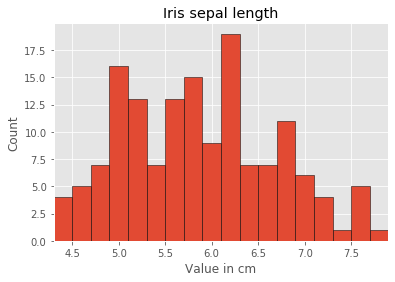

In [19]:
#Using matplotlib - shown on iris sepal length variable
plt.hist(dat, bins=num,ec="black") # Earlier calculated number of bins
plt.xlabel("Value in cm")
plt.ylabel("Count")
plt.title("Iris sepal length")
plt.xlim(min(dat), max(dat))
plt.show()

### 4.2. Bar Plot<a name="bar"></a>

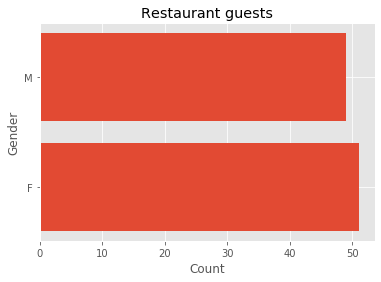

In [20]:
#Using matplotlib - shown on restaurant guests gender variable
dat=data["Restaurant guests"]["Gender"].value_counts()

plt.barh(y=dat.index,width=dat.values)
plt.title("Restaurant guests")
plt.xlabel("Count")
plt.ylabel("Gender")
plt.yticks(dat.index)
plt.show()

### 4.3. Frequency Polygon<a name="freqpol"></a>

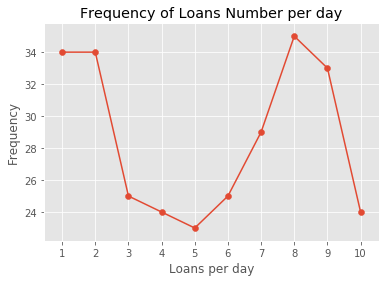

In [21]:
#Using matplotlib - shown on Frequency of Loans Number per day
plt.plot(DF["Absolute_Freq."].index, DF["Absolute_Freq."].values)
plt.scatter(DF["Absolute_Freq."].index, DF["Absolute_Freq."].values)
plt.xticks(DF["Absolute_Freq."].index)
plt.title('Frequency of Loans Number per day')
plt.xlabel("Loans per day")
plt.ylabel("Frequency")
plt.show()

### 4.4. Scatter Diagram<a name="scatter"></a>

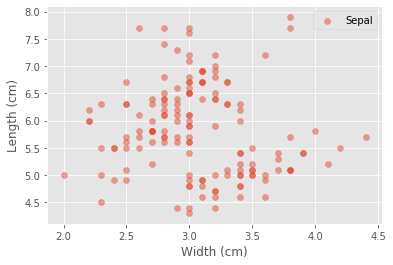

In [22]:
#Using matplotlib - shown on iris petal width and length variables
plt.scatter(iris["sepal width (cm)"], iris["sepal length (cm)"], label="Sepal",alpha=0.5)
plt.xlabel("Width (cm)")
plt.ylabel("Length (cm)")
plt.legend(loc="upper right")
plt.show()

### 4.5. Pie Plot<a name="pie"></a>

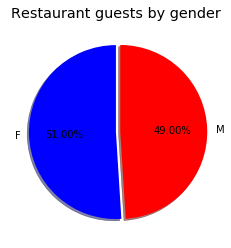

In [23]:
#Using matplotlib - shown on restaurant guests gender variable
dat=data["Restaurant guests"]["Gender"].value_counts()

slices=dat.values
lab=dat.index
cols = ["blue","red"]

plt.pie(slices,labels=lab,colors=cols,startangle=90,shadow= True,explode=(0,0.05),autopct='%1.2f%%')
plt.title('Restaurant guests by gender')
plt.show()

### 4.6. Box & Whisker Plot<a name="box"></a>

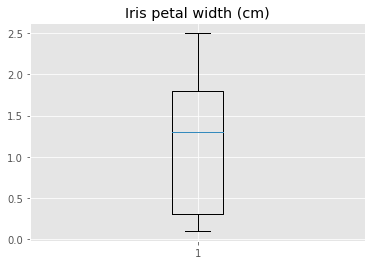

In [24]:
#Using matplotlib - shown on iris petal width variable
plt.boxplot(iris["petal width (cm)"])
plt.title("Iris petal width (cm)")
plt.show()

Note: Default whiskers are 1.5xIQR.    
We can see that iris petal width variable has no outliers

## 5. Exercises<a name="exercise"></a>
--------------------------------------------------------

### 5.1. Exercise 1<a name="ex1"></a>

In the given file „Data for Lab 1” in the sheet „Loans number” you have data about the number of given loans per day for one bank branch.

In [25]:
data["Loans Number"]

,Loans number per day Branch 1
0,4
1,7
2,1
3,9
4,1
...,...
281,2
282,5
283,8
284,3


Using that data draw the table with frequency distribution.

In [26]:
DF=data['Loans Number'].apply(pd.value_counts).sort_index()
DF.rename(columns={"Loans number per day Branch 1": "Absolute_Freq."},inplace=True)
DF

,Absolute_Freq.
1,34
2,34
3,25
4,24
5,23
6,25
7,29
8,35
9,33
10,24


After you draw that data calculate relative frequencies as a proportion.

Calculate relative frequencies as a percentage.

Calculate cumulative sequences for realtive and absolute frequencies.


In [27]:
DF["Relative_Prop"]=DF/DF.sum()
DF["Relative%"]=DF["Relative_Prop"]*100

DF["Cum_Relative_Prop"]=DF["Relative_Prop"].cumsum()
DF["Cum_Relative%"]=DF["Relative%"].cumsum()

DF

,Absolute_Freq.,Relative_Prop,Relative%,Cum_Relative_Prop,Cum_Relative%
1,34,0.118881,11.888112,0.118881,11.888112
2,34,0.118881,11.888112,0.237762,23.776224
3,25,0.087413,8.741259,0.325175,32.517483
4,24,0.083916,8.391608,0.409091,40.909091
5,23,0.080420,8.041958,0.489510,48.951049
6,25,0.087413,8.741259,0.576923,57.692308
7,29,0.101399,10.139860,0.678322,67.832168
8,35,0.122378,12.237762,0.800699,80.069930
9,33,0.115385,11.538462,0.916084,91.608392
10,24,0.083916,8.391608,1.000000,100.000000


Draw histogram of absolute frequencies.

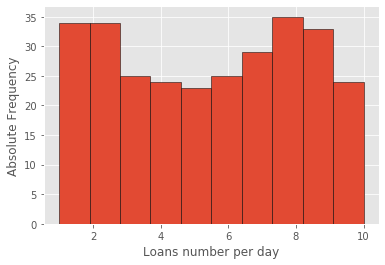

In [28]:
plt.hist(data["Loans Number"]["Loans number per day Branch 1"],ec='black',bins=10)
plt.xlabel("Loans number per day")
plt.ylabel("Absolute Frequency")

plt.show()

Calculate average, median and mod

In [29]:
data_cmt=data['Loans Number']["Loans number per day Branch 1"]
print("Average: " +str(data_cmt.mean()))
print("Median: " +str(data_cmt.median()))
print("Mode: " +str(data_cmt.mode()[0]))

Average: 5.4475524475524475
Median: 6.0
Mode: 8


### 5.2. Exercise 2<a name="ex2"></a>

In the given file „Data for Lab 1” in the sheet „Loan amount” you have data about the values of given loans for one bank branch.

In [30]:
data["Loan Amount"]

,Loans
0,1000
1,2000
2,3000
3,5000
4,6000
...,...
139,197000
140,198000
141,198000
142,198000


Using that data draw the table with frequency distribution based on the width interval range 20000.

In [31]:
dat=data["Loan Amount"]["Loans"]
table=pd.cut(dat,np.arange(0, max(dat) + 20000, 20000)).value_counts().sort_index()
table

(0, 20000]          16
(20000, 40000]       7
(40000, 60000]      18
(60000, 80000]      16
(80000, 100000]     12
(100000, 120000]    16
(120000, 140000]    10
(140000, 160000]    14
(160000, 180000]    16
(180000, 200000]    19
Name: Loans, dtype: int64

After you draw that data calculate relative frequencies as a proportion 

In [32]:
table=table.to_frame()
table["Relative_Freq"]=table.values/(table.values.sum())
table

,Loans,Relative_Freq
"(0, 20000]",16,0.111111
"(20000, 40000]",7,0.048611
"(40000, 60000]",18,0.125000
"(60000, 80000]",16,0.111111
"(80000, 100000]",12,0.083333
"(100000, 120000]",16,0.111111
"(120000, 140000]",10,0.069444
"(140000, 160000]",14,0.097222
"(160000, 180000]",16,0.111111
"(180000, 200000]",19,0.131944


Calculate relative frequencies as a percentage.

In [33]:
table["Relative_Freq%"]=table["Relative_Freq"]*100
table

,Loans,Relative_Freq,Relative_Freq%
"(0, 20000]",16,0.111111,11.111111
"(20000, 40000]",7,0.048611,4.861111
"(40000, 60000]",18,0.125000,12.500000
"(60000, 80000]",16,0.111111,11.111111
"(80000, 100000]",12,0.083333,8.333333
"(100000, 120000]",16,0.111111,11.111111
"(120000, 140000]",10,0.069444,6.944444
"(140000, 160000]",14,0.097222,9.722222
"(160000, 180000]",16,0.111111,11.111111
"(180000, 200000]",19,0.131944,13.194444


Calculate cumulative sequences for relative and absolute frequencies

In [34]:
table["Cum_Absolute"]=table["Loans"].cumsum()
table["Cum_Relative_Freq"]=table["Relative_Freq"].cumsum()
table["Cum_Relative_Freq%"]=table["Relative_Freq%"].cumsum()
table

,Loans,Relative_Freq,Relative_Freq%,Cum_Absolute,Cum_Relative_Freq,Cum_Relative_Freq%
"(0, 20000]",16,0.111111,11.111111,16,0.111111,11.111111
"(20000, 40000]",7,0.048611,4.861111,23,0.159722,15.972222
"(40000, 60000]",18,0.125000,12.500000,41,0.284722,28.472222
"(60000, 80000]",16,0.111111,11.111111,57,0.395833,39.583333
"(80000, 100000]",12,0.083333,8.333333,69,0.479167,47.916667
"(100000, 120000]",16,0.111111,11.111111,85,0.590278,59.027778
"(120000, 140000]",10,0.069444,6.944444,95,0.659722,65.972222
"(140000, 160000]",14,0.097222,9.722222,109,0.756944,75.694444
"(160000, 180000]",16,0.111111,11.111111,125,0.868056,86.805556
"(180000, 200000]",19,0.131944,13.194444,144,1.000000,100.000000


Draw appropriate graph for absolute frequencies

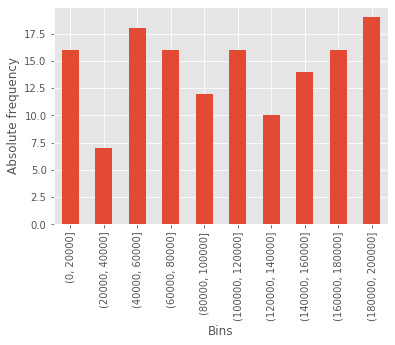

In [35]:
pd.cut(dat,np.arange(0, max(dat) + 20000, 20000)).value_counts().sort_index().plot(kind='bar')
plt.xlabel("Bins")
plt.ylabel("Absolute frequency")
plt.show()

### 5.3. Exercise 3<a name="ex3"></a>

In the given file „Data for Lab 1” in the sheet „Restaurant guests” you have data about restaurant quest , the guest gender and number of restaurant visit for every quest.

In [36]:
data["Restaurant guests"]

,Guest ID,Gender,Number of restaurant visit
0,1,M,2
1,2,F,1
2,3,M,2
3,4,M,1
4,5,F,1
...,...,...,...
95,96,F,1
96,97,F,2
97,98,M,2
98,99,M,3


Using that data draw the cross table with grouping data by gender and number of restaurant visit .

In [37]:
table=pd.crosstab(data["Restaurant guests"]["Gender"], data["Restaurant guests"]["Number of restaurant visit"])
table

Number of restaurant visit,1,2,3
Gender,,,
F,16,22,13
M,20,20,9


Draw cross table with relative frequencies  (basis total sum in the row).

In [38]:
table.apply(lambda r: r/r.sum(), axis=1)

Number of restaurant visit,1,2,3
Gender,,,
F,0.313725,0.431373,0.254902
M,0.408163,0.408163,0.183673


Draw cross table with relative frequencies  (basis total sum in the column)

In [39]:
table.apply(lambda c: c/c.sum(), axis=0)

Number of restaurant visit,1,2,3
Gender,,,
F,0.444444,0.52381,0.590909
M,0.555556,0.47619,0.409091


### 5.4. Exercise 4<a name="ex4"></a>

In the given file „Data for Lab 1” in the sheet „Exercise 4” you have data about approved loans. Below is the table from the sheet.

In [40]:
table=data["Exercise 4"]
table

,Loan amount in 000 HRK,Number of approved loans,Relative frequency - percentage,Cumulative of absolute frequencies,Cumulative of relative frequencies percentage
0,0 - 20,2,1.69,2.0,1.69
1,20 - 40,8,6.78,NaN,NaN
2,40 - 60,16,13.55,NaN,NaN
3,60 - 80,21,NaN,NaN,NaN
4,80 - 100,18,NaN,NaN,NaN
5,100 - 120,14,NaN,NaN,NaN
6,120 - 140,12,NaN,NaN,NaN
7,140 - 160,10,NaN,NaN,NaN
8,160 - 180,9,7.62,NaN,NaN
9,180 - 200,8,6.78,NaN,NaN


Fill in the missing fields in the table.

In [41]:
table["Relative frequency - percentage"]=table[0:10]["Number of approved loans"]/table["Number of approved loans"].iloc[10]*100
sum=table["Relative frequency - percentage"][0:10].sum()
table["Relative frequency - percentage"].iat[10]=sum


table["Cumulative of absolute frequencies"]=table[0:10]["Number of approved loans"].cumsum()
sum=table["Cumulative of absolute frequencies"][0:10].sum()
table["Cumulative of absolute frequencies"].iat[10]=sum
#Total of cumulative column isn't valuable info, but I filled it anyway, so the value isn't NaN

table["Cumulative of relative frequencies percentage"]=table[0:10]["Relative frequency - percentage"].cumsum()
sum=table["Cumulative of relative frequencies percentage"][0:10].sum()
table["Cumulative of relative frequencies percentage"].iat[10]=sum
#Total of cumulative column isn't valuable info, but I filled it anyway, so the value isn't NaN
table

,Loan amount in 000 HRK,Number of approved loans,Relative frequency - percentage,Cumulative of absolute frequencies,Cumulative of relative frequencies percentage
0,0 - 20,2,1.694915,2.0,1.694915
1,20 - 40,8,6.779661,10.0,8.474576
2,40 - 60,16,13.559322,26.0,22.033898
3,60 - 80,21,17.796610,47.0,39.830508
4,80 - 100,18,15.254237,65.0,55.084746
5,100 - 120,14,11.864407,79.0,66.949153
6,120 - 140,12,10.169492,91.0,77.118644
7,140 - 160,10,8.474576,101.0,85.593220
8,160 - 180,9,7.627119,110.0,93.220339
9,180 - 200,8,6.779661,118.0,100.000000


Show this frequency distribution by histograms using absolute and relative frequencies.

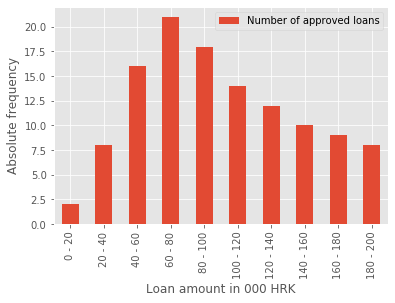

In [42]:
table[:-1].plot(x='Loan amount in 000 HRK', y='Number of approved loans', kind='bar')
plt.ylabel("Absolute frequency")
plt.show()

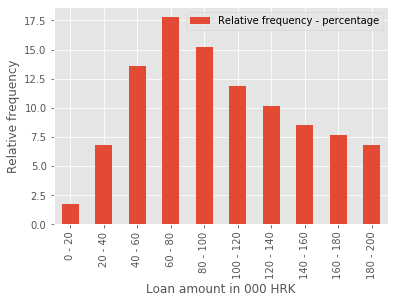

In [43]:
table[:-1].plot(x='Loan amount in 000 HRK', y='Relative frequency - percentage', kind='bar')
plt.ylabel("Relative frequency")
plt.show()

### 5.5. Exercise 5<a name="ex5"></a>

In [44]:
a=np.arange(1,10)
b=np.array([2800,1300,1000,1700,2200,1300,800,1400,2100])
c=np.array([4,3,5,6,8,3,1,2,5])
d=np.array([8,7,11,9,15,4,6,7,3])
li = np.array([a,b, c, d]).T
columns=("Week/Saturday","Turnover in HRK","Number of customers","Number of phone calls")

In [45]:
data=pd.DataFrame(data=li,columns=columns)
data

,Week/Saturday,Turnover in HRK,Number of customers,Number of phone calls
0,1,2800,4,8
1,2,1300,3,7
2,3,1000,5,11
3,4,1700,6,9
4,5,2200,8,15
5,6,1300,3,4
6,7,800,1,6
7,8,1400,2,7
8,9,2100,5,3


Calculate average turnover

In [46]:
data["Turnover in HRK"].mean()

1622.2222222222222

Calculate the turnover deviation from the average for each Saturday

In [47]:
data["Deviation"]=data["Turnover in HRK"].mean()-data["Turnover in HRK"]
data

,Week/Saturday,Turnover in HRK,Number of customers,Number of phone calls,Deviation
0,1,2800,4,8,-1177.777778
1,2,1300,3,7,322.222222
2,3,1000,5,11,622.222222
3,4,1700,6,9,-77.777778
4,5,2200,8,15,-577.777778
5,6,1300,3,4,322.222222
6,7,800,1,6,822.222222
7,8,1400,2,7,222.222222
8,9,2100,5,3,-477.777778


Group data into 5 intervals that have the same width

In [48]:
data["Bins"]=pd.cut(data["Turnover in HRK"],bins=5)
data

,Week/Saturday,Turnover in HRK,Number of customers,Number of phone calls,Deviation,Bins
0,1,2800,4,8,-1177.777778,"(2400.0, 2800.0]"
1,2,1300,3,7,322.222222,"(1200.0, 1600.0]"
2,3,1000,5,11,622.222222,"(798.0, 1200.0]"
3,4,1700,6,9,-77.777778,"(1600.0, 2000.0]"
4,5,2200,8,15,-577.777778,"(2000.0, 2400.0]"
5,6,1300,3,4,322.222222,"(1200.0, 1600.0]"
6,7,800,1,6,822.222222,"(798.0, 1200.0]"
7,8,1400,2,7,222.222222,"(1200.0, 1600.0]"
8,9,2100,5,3,-477.777778,"(2000.0, 2400.0]"


Draw histogram

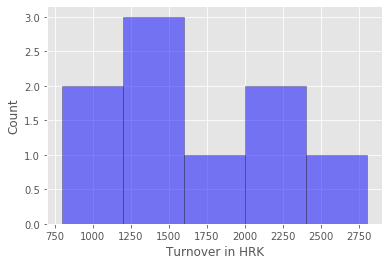

In [49]:
plt.hist(data["Turnover in HRK"], 5, facecolor='blue', alpha=0.5,ec="black")
plt.ylabel("Count")
plt.xlabel("Turnover in HRK")
plt.show()
